UCB

IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

IMPORTING DATASET

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

IMPLEMENTNG THE UCB

In [3]:
from math import log
from math import sqrt

N = 10000
d = 10
ads_selected = []
numbers_of_selection = [0] * d
sums_of_rewards = [0] * d
total_rewards = 0
for i in range(0, N):
  ad = 0
  max_upper_bound = 0
  for j in range(0, d):
    if (numbers_of_selection[j] > 0):
      average_reward = sums_of_rewards[j] / numbers_of_selection[j]
      delta = sqrt(3/2 * log(i + 1) / numbers_of_selection[j])
      upper_bound = average_reward + delta
    else:
      upper_bound = 1e400
    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = j

  ads_selected.append(ad)
  numbers_of_selection[ad] = numbers_of_selection[ad] + 1
  reward = dataset.values[i, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_rewards = total_rewards + reward

VISUALISING THE RESULTS

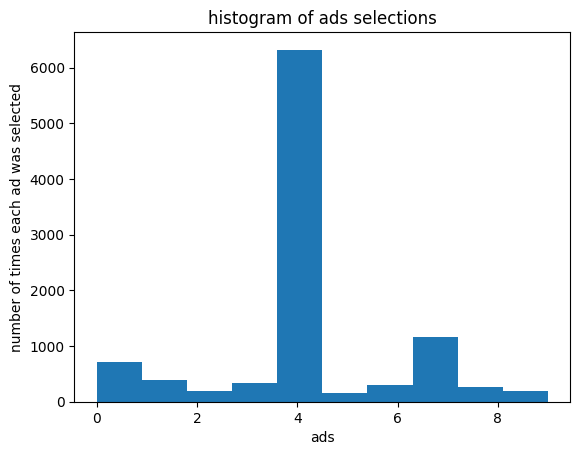

In [4]:
plt.hist(ads_selected)
plt.title('histogram of ads selections')
plt.xlabel('ads')
plt.ylabel('number of times each ad was selected')
plt.show()